<h1 align="center"><strong>XgBoost code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve , r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [2]:
df = pd.read_csv("../data/Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [5]:
df.describe(include='O')

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values' , '\n')

Age 4.62357 % missing values 

TypeofContact 0.51146 % missing values 

DurationOfPitch 5.13502 % missing values 

NumberOfFollowups 0.92062 % missing values 

PreferredPropertyStar 0.53191 % missing values 

NumberOfTrips 2.86416 % missing values 

NumberOfChildrenVisiting 1.35025 % missing values 

MonthlyIncome 4.76678 % missing values 



In [8]:
missing_columns = df.columns[df.isnull().any()]
missing_columns

Index(['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting',
       'MonthlyIncome'],
      dtype='object')

In [9]:
categories = df.select_dtypes(include=['object']).columns
for col in categories:
    print(f"value counts for:\n{df[col].value_counts()}\n")
    print("-" * 40)

value counts for:
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

----------------------------------------
value counts for:
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

----------------------------------------
value counts for:
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

----------------------------------------
value counts for:
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

----------------------------------------
value counts for:
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

----------------------------------------
value counts for:
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230

In [10]:
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 'Unmarried')

In [11]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [13]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

C:\Users\abdal\AppData\Local\Temp\ipykernel_14280\3927510868.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(), inplace=True)
C:\Users\abdal\AppData\Local\Temp\ipykernel_14280\3927510868.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [14]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [15]:
df.drop('CustomerID', inplace=True, axis=1)

## Feature Engineering

### Feature Extraction

In [16]:
# create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [17]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 12


In [18]:
##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 6


In [19]:
## Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 9


In [20]:
## coontinuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


## Train Test Split And Model Training

In [21]:
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [22]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [23]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [24]:
# Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [25]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [26]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy      : {:.4f}".format(model_train_accuracy))
    print('- F1 score      : {:.4f}'.format(model_train_f1))
    print('- Precision     : {:.4f}'.format(model_train_precision))
    print('- Recall        : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy      : {:.4f}'.format(model_test_accuracy))
    print('- F1 score      : {:.4f}'.format(model_test_f1))
    print('- Precision     : {:.4f}'.format(model_test_precision))
    print('- Recall        : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))
    print('\n')
    print('='*35)

Logisitic Regression
Model performance for Training set
- Accuracy      : 0.8460
- F1 score      : 0.8202
- Precision     : 0.7016
- Recall        : 0.3032
- Roc Auc Score : 0.6368
----------------------------------
Model performance for Test set
- Accuracy      : 0.8364
- F1 score      : 0.8087
- Precision     : 0.6914
- Recall        : 0.2932
- Roc Auc Score : 0.6307


Decision Tree
Model performance for Training set
- Accuracy      : 1.0000
- F1 score      : 1.0000
- Precision     : 1.0000
- Recall        : 1.0000
- Roc Auc Score : 1.0000
----------------------------------
Model performance for Test set
- Accuracy      : 0.9162
- F1 score      : 0.9153
- Precision     : 0.8011
- Recall        : 0.7592
- Roc Auc Score : 0.8567


Random Forest
Model performance for Training set
- Accuracy      : 1.0000
- F1 score      : 1.0000
- Precision     : 1.0000
- Recall        : 1.0000
- Roc Auc Score : 1.0000
----------------------------------
Model performance for Test set
- Accuracy      : 0

In [27]:
## Hyperparameter Training
rf_params = {   "max_depth": [5, 8, 15, None, 10],
                "max_features": [5, 7, "auto", 8],
                "min_samples_split": [2, 8, 15, 20],
                "n_estimators": [100, 200, 500, 1000]}
xgboost_params = {  "learning_rate": [0.1, 0.01],
                    "max_depth": [5, 8, 12, 20, 30],
                    "n_estimators": [100, 200, 300],
                    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

# Models list for Hyperparameter tuning
randomcv_models = [
                    ("RF", RandomForestClassifier(), rf_params),
                    ("Xgboost", XGBClassifier(), xgboost_params)
]

In [28]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\abdal\anaconda3\envs\ds-core\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\abdal\anaconda3\envs\ds-core\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\abdal\anaconda3\envs\ds-core\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\abdal\anaconda3\envs\ds-core\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [29]:
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [30]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=8,max_depth=None),
    "Xgboost":XGBClassifier(n_estimators=300,max_depth=8,learning_rate=0.1,colsample_bytree=0.8)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy       : {:.4f}".format(model_train_accuracy))
    print('- F1 score       : {:.4f}'.format(model_train_f1))
    print('- Precision      : {:.4f}'.format(model_train_precision))
    print('- Recall         : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score  : {:.4f}'.format(model_train_rocauc_score))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy       : {:.4f}'.format(model_test_accuracy))
    print('- F1 score       : {:.4f}'.format(model_test_f1))
    print('- Precision      : {:.4f}'.format(model_test_precision))
    print('- Recall         : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score  : {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy       : 1.0000
- F1 score       : 1.0000
- Precision      : 1.0000
- Recall         : 1.0000
- Roc Auc Score  : 1.0000
----------------------------------
Model performance for Test set
- Accuracy       : 0.9335
- F1 score       : 0.9291
- Precision      : 0.9632
- Recall         : 0.6859
- Roc Auc Score  : 0.8398


Xgboost
Model performance for Training set
- Accuracy       : 1.0000
- F1 score       : 1.0000
- Precision      : 1.0000
- Recall         : 1.0000
- Roc Auc Score  : 1.0000
----------------------------------
Model performance for Test set
- Accuracy       : 0.9540
- F1 score       : 0.9522
- Precision      : 0.9679
- Recall         : 0.7906
- Roc Auc Score  : 0.8921




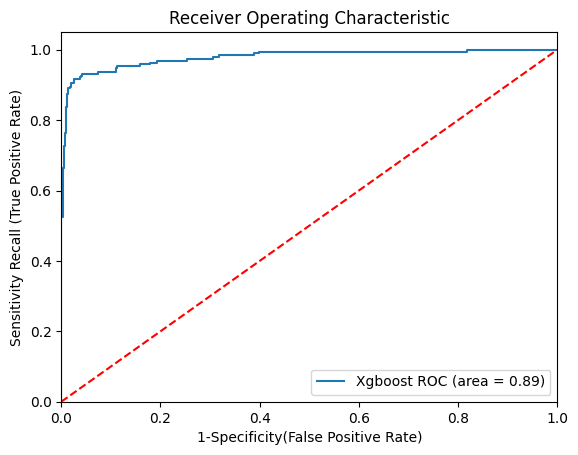

In [31]:
## Plot ROC AUC Curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Xgboost',
    'model':XGBClassifier(n_estimators=200,max_depth=12,learning_rate=0.1,colsample_bytree=1),
    'auc':  0.8882
},
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity Recall (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

# **XGboost Regression**

In [32]:
housing = fetch_california_housing()
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [33]:
x = housing.data
y = housing.target

In [34]:
df = pd.DataFrame(data=x,columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
## Check Null Values , Check features with nan value
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [38]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [39]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- RMSE     : {:.4f}".format(model_train_rmse))
    print("- MAE      : {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- RMSE     : {:.4f}".format(model_test_rmse))
    print("- MAE      : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- RMSE     : 0.7197
- MAE      : 0.5286
- R2 Score : 0.6126
----------------------------------
Model performance for Test set
- RMSE     : 0.7456
- MAE      : 0.5332
- R2 Score : 0.5758


Lasso
Model performance for Training set
- RMSE     : 0.9739
- MAE      : 0.7671
- R2 Score : 0.2904
----------------------------------
Model performance for Test set
- RMSE     : 0.9685
- MAE      : 0.7616
- R2 Score : 0.2842


Ridge
Model performance for Training set
- RMSE     : 0.7197
- MAE      : 0.5286
- R2 Score : 0.6126
----------------------------------
Model performance for Test set
- RMSE     : 0.7455
- MAE      : 0.5332
- R2 Score : 0.5759


K-Neighbors Regressor
Model performance for Training set
- RMSE     : 0.8552
- MAE      : 0.6561
- R2 Score : 0.4529
----------------------------------
Model performance for Test set
- RMSE     : 1.0577
- MAE      : 0.8128
- R2 Score : 0.1463


Decision Tree
Model performance for Training set
- RMSE 

In [40]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {   "max_depth": [5, 8, 15, None, 10],
                "max_features": [5, 7, "auto", 8],
                "min_samples_split": [2, 8, 15, 20],
                "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {  "learning_rate": [0.1, 0.01],
                    "max_depth": [5, 8, 12, 20, 30],
                    "n_estimators": [100, 200, 300],
                    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

# Models list for Hyperparameter tuning
randomcv_models = [
                ("RF", RandomForestRegressor(), rf_params),
                ("XGboost",XGBRegressor(),xgboost_params)
]

In [41]:
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
---------------- Best Params for Xgboost -------------------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [42]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features=5, max_depth=None, n_jobs=-1),
    "Xgboost Regressor": XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, colsample_bytree=0.5)

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- RMSE     : {:.4f}".format(model_train_rmse))
    print("- MAE      : {:.4f}".format(model_train_mae))
    print("- R2 Score : {:.4f}".format(model_train_r2))
    print('----------------------------------')
    print('Model performance for Test set')
    print("- RMSE     : {:.4f}".format(model_test_rmse))
    print("- MAE      : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- RMSE     : 0.1847
- MAE      : 0.1201
- R2 Score : 0.9745
----------------------------------
Model performance for Test set
- RMSE     : 0.5005
- MAE      : 0.3236
- R2 Score : 0.8088


Xgboost Regressor
Model performance for Training set
- RMSE     : 0.3443
- MAE      : 0.2397
- R2 Score : 0.9113
----------------------------------
Model performance for Test set
- RMSE     : 0.4597
- MAE      : 0.3045
- R2 Score : 0.8387




# **XgBoost**

In [43]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(
    objective='multi:softprob',
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1
)

# Train the classifier
xgb_clf.fit(X_train, y_train)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [45]:
# Make predictions
y_pred = xgb_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
